# Advanced Classification Predict 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>


In [131]:
# Import libraries
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re

#set plot style
sns.set()

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


In [172]:
# Load files
train_ds = pd.read_csv('C:/Users/anyangma/Desktop/Classification/GitFolder/train.csv')
# test = pd.read_csv('test.csv')
# samplesubmission = pd.read_csv('sample_submission.csv')

# Preview train dataset
train_ds.head()


,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [173]:
# Preview test dataset
# test.head()

In [174]:
# Preview sample submission file
# samplesubmission.head()

In [175]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In [176]:
# Check size and shape of datasets
train_ds.shape, # test.shape, samplesubmission.shape

((15819, 3),)

In [177]:
# The total number of classes in our dataset
type_labels = list(train_ds.sentiment.unique())
print(type_labels)

[1, 2, 0, -1]


<AxesSubplot:>

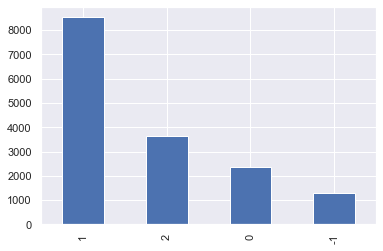

In [178]:
# Bargraph illustrating sentiments per class
train_ds['sentiment'].value_counts().plot(kind ='bar')


C:\Users\anyangma\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


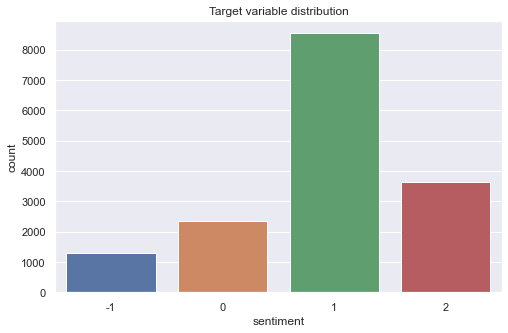

In [179]:
# Target variable distribution
sns.set_style('darkgrid')
plt.figure(figsize=(8, 5))
sns.countplot(train["sentiment"])
plt.title('Target variable distribution')
plt.show()

The target variable is not well balanced.
Some of the techniques to handle imbalanceness include:
- Smote
- Oversampling
- Undersampling ...

In [251]:
# Check for missing values
train_ds2.isnull().sum().any()# test.isnull().sum().any() 

False

No missing values 

In [ ]:
# Check for duplicates
train.duplicated().any(), test.duplicated().any()

No duplicated values 

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

# Text Cleaning

Creating array of sentiments and messages

In [ ]:
train_ds2 = []
for i, row in train_ds.iterrows():
    for post in row['message'].split('|||'):
        train_ds2.append([row['sentiment'], post])
train_ds2 = pd.DataFrame(train_ds2, columns=['sentiment', 'message'])

In [ ]:
train_ds2.shape   # Getting the total rows and columns

Bargraph showing class distribution

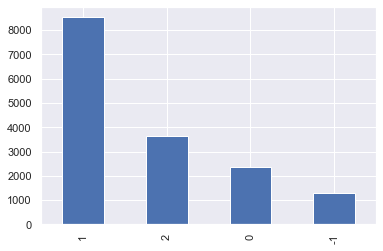

In [181]:
train_ds2['sentiment'].value_counts().plot(kind = 'bar')
plt.show()

Regular Expressions

Removing web-urls and repalcing with keyword url-web

In [182]:
pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
subs_url = ''
train_ds2['message'] = train_ds2['message'].replace(to_replace = pattern_url, value = 0, regex = True)

In [230]:
#reg_ex = re.sub(r'rt[\s]+',"")  
train_ds2['message'] = train_ds2['message'].apply(lambda x: re.sub(r'rt[\s]+', '', x)) # x individual

In [231]:
train_ds2.tail(3)

,sentiment,message,tokens,stem,lemma
15817,0,notiven nytimesworld what does trump actually ...,"[notiven, rt, nytimesworld, what, does, trump,...","[notiven, rt, nytimesworld, trump, actually, b...","[notiven, rt, nytimesworld, what, doe, trump, ..."
15818,-1,sara8smiles hey liberals the climate change cr...,"[rt, sara8smiles, hey, liberals, the, climate,...","[rt, sara8smiles, hey, liberals, climate, chan...","[rt, sara8smiles, hey, liberal, the, climate, ..."
15819,0,chetcannon kurteichenwalds climate change equa...,"[rt, chetcannon, kurteichenwalds, climate, cha...","[rt, chetcannon, kurteichenwalds, climate, cha...","[rt, chetcannon, kurteichenwalds, climate, cha..."


In [184]:
# Convert all text to lower case
train_ds2['message'] = train_ds2['message'].str.lower()

Remove punctuation marks using the string class

In [185]:
import string
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [186]:
def remove_punctuation(message):
    return ''.join([l for l in message if l not in string.punctuation])

In [187]:
train_ds2['message'] = train_ds2['message'].apply(remove_punctuation)
train_ds2['message'].iloc[15819]

'rt chetcannon kurteichenwalds climate change equation in 4 screenshots urlweb'

# Tokenization

In [188]:
from nltk.tokenize import word_tokenize, TreebankWordTokenizer

In [189]:
tokeniser = TreebankWordTokenizer()
train_ds2['tokens'] = train_ds2['message'].apply(tokeniser.tokenize)

In [190]:
train_ds2['tokens'].iloc[15819]

['rt',
 'chetcannon',
 'kurteichenwalds',
 'climate',
 'change',
 'equation',
 'in',
 '4',
 'screenshots',
 'urlweb']

# Stemming

In [191]:
from nltk import SnowballStemmer, PorterStemmer, LancasterStemmer

In [192]:
def mbti_stemmer(words, stemmer):
    return [stemmer.stem(word) for word in words]

In [193]:
stemmer = SnowballStemmer('english')


In [194]:
train_ds2['stem'] = train_ds2['tokens'].apply(mbti_stemmer, args=(stemmer, ))

In [195]:
for i, t in enumerate(train_ds2.iloc[15819]['tokens']):    
    print ('{:20s} --> {:10s}'.format(t, train_ds2.iloc[15819]['stem'][i]))

rt                   --> rt        
chetcannon           --> chetcannon
kurteichenwalds      --> kurteichenwald
climate              --> climat    
change               --> chang     
equation             --> equat     
in                   --> in        
4                    --> 4         
screenshots          --> screenshot
urlweb               --> urlweb    


# Lemmatization

In [196]:
from nltk.stem import WordNetLemmatizer
#nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

In [197]:
def mbti_lemma(words, lemmatizer):
    return [lemmatizer.lemmatize(word) for word in words] 

In [198]:
train_ds2['lemma'] = train_ds2['tokens'].apply(mbti_lemma, args=(lemmatizer, ))

In [199]:
for i, t in enumerate(train_ds2.iloc[15819]['tokens']):    
    print ('{:20s} --> {:10s}'.format(t, train_ds2.iloc[15819]['lemma'][i]))

rt                   --> rt        
chetcannon           --> chetcannon
kurteichenwalds      --> kurteichenwalds
climate              --> climate   
change               --> change    
equation             --> equation  
in                   --> in        
4                    --> 4         
screenshots          --> screenshots
urlweb               --> urlweb    


# Stop Words

In [200]:
from nltk.corpus import stopwords

In [201]:
def remove_stop_words(tokens):    
    return [t for t in tokens if t not in stopwords.words('english')]

In [202]:
train_ds2['stem'] = train_ds2['tokens'].apply(remove_stop_words)

In [203]:
# train ---- Need to confirm

# Transforming text to numbers

In [204]:
from sklearn.feature_extraction.text import CountVectorizer

In [205]:
train_ds2.head()

,sentiment,message,tokens,stem,lemma
0,1,polyscimajor epa chief doesnt think carbon dio...,"[polyscimajor, epa, chief, doesnt, think, carb...","[polyscimajor, epa, chief, doesnt, think, carb...","[polyscimajor, epa, chief, doesnt, think, carb..."
1,1,its not like we lack evidence of anthropogenic...,"[its, not, like, we, lack, evidence, of, anthr...","[like, lack, evidence, anthropogenic, global, ...","[it, not, like, we, lack, evidence, of, anthro..."
2,2,rt rawstory researchers say we have three year...,"[rt, rawstory, researchers, say, we, have, thr...","[rt, rawstory, researchers, say, three, years,...","[rt, rawstory, researcher, say, we, have, thre..."
3,1,todayinmaker wired 2016 was a pivotal year in...,"[todayinmaker, wired, 2016, was, a, pivotal, y...","[todayinmaker, wired, 2016, pivotal, year, war...","[todayinmaker, wired, 2016, wa, a, pivotal, ye..."
4,1,rt soynoviodetodas its 2016 and a racist sexis...,"[rt, soynoviodetodas, its, 2016, and, a, racis...","[rt, soynoviodetodas, 2016, racist, sexist, cl...","[rt, soynoviodetodas, it, 2016, and, a, racist..."


In [152]:
# Let's use the count vectorizer with its default hyperparameters
vect = CountVectorizer()
X_count = vect.fit_transform(train_ds2['message'].values.astype(str))

In [153]:
X_count.shape

(15820, 24819)

In [154]:
vect_20 = CountVectorizer(max_features=20)
X_count = vect_20.fit_transform(train_ds2['message'].values.astype(str))

In [155]:
# Get shape of our new predictive variables
X_count.shape

(15820, 20)

In [156]:
# Uncomment and run this line to see feature names
vect_20.get_feature_names()

C:\Users\anyangma\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['about',
 'and',
 'are',
 'change',
 'climate',
 'for',
 'global',
 'in',
 'is',
 'of',
 'on',
 'rt',
 'that',
 'the',
 'to',
 'trump',
 'urlweb',
 'warming',
 'we',
 'you']

In [220]:
X = X_count.toarray()

In [221]:
#X.reshape(-1,1)

In [222]:
y = train_ds2['sentiment']

In [233]:
pip install imblearn

In [236]:
from imblearn.over_sampling import SMOTE

In [237]:
# transform the dataset
oversample = SMOTE(random_state = 42)
X_res, y_res = oversample.fit_resample(X, y)

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In [224]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [238]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=27)

In [239]:
X.shape

(15820, 20)

In [240]:
#X.reshape(-1,1)

In [241]:
# Here 'ovr' indicates that we have selected our One-vs-Rest strategy. 
logreg = LogisticRegression(multi_class='ovr')

In [242]:
logreg.fit(X_train, y_train)

LogisticRegression(multi_class='ovr')

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In [247]:
# Generate predictions
y_pred_test = logreg.predict(X_test)

In [248]:
# print(f'{classification_report(y_test, y_pred)}')

In [249]:
# Classification report
from sklearn.metrics import classification_report
#print(classification_report(y_test, y_pred_test, target_names=type_labels))
print(f'{classification_report(y_test, y_pred_test)}')

import warnings
warnings.filterwarnings('ignore')

              precision    recall  f1-score   support

          -1       0.49      0.40      0.44      1671
           0       0.48      0.44      0.46      1667
           1       0.52      0.49      0.50      1698
           2       0.59      0.76      0.66      1788

    accuracy                           0.53      6824
   macro avg       0.52      0.52      0.52      6824
weighted avg       0.52      0.53      0.52      6824



<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>